<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2024/blob/main/SEBB4083_Mini_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project 2024 (Groceries Detection)
### Total marks: 30

### Group No.: 7

###Group Members:
1) FATIN LIYANA BINTI KHARI (A20EB0017)

2) KAN NAE CHERNG (A20EB0025)

3) LEE JIA WEN (A20EB0028)

4) ANIS ASYA SAFIRA (A20EB0105)

5) MARIA ALESSANDRA SABINIANO FLORIDA (A20EB4009)


## Chapter 1: Introduction


###1.1 Background of study and related works

Grocery shopping is one of the many daily tasks that people with visual impairment find extremely difficult. Automated grocery detecting systems utilise technology to potentially address these difficulties. Convolutional neural networks (CNNs), in particular, have demonstrated encouraging results in picture classification tasks in recent advances in computer vision and machine learning. These findings can be utilised to create efficient grocery detecting systems.

Convolutional Neural Networks (CNNs) have emerged as a powerful tool for image classification tasks due to their ability to learn hierarchical features from raw image data. Transfer learning, a method where a pre-trained network is fine-tuned on a new, often smaller dataset, has proven to be effective in scenarios where the available data is limited. This approach leverages the knowledge gained from large datasets and applies it to specific tasks, reducing the need for extensive labeled data and computational resources.

Several studies have explored the use of CNNs for grocery detection. For example, the research by PhilJd on the Freiburg Groceries Dataset demonstrated how CNNs could effectively classify grocery items. Similarly, transfer learning has been successfully applied in various fields, including medical image analysis and object detection in autonomous vehicles, showcasing its versatility and effectiveness.

In this project, we aim to build upon these advancements by developing an automated grocery detection system specifically designed for visually impaired individuals. The system will utilize CNN-based transfer learning to classify two common grocery items—pasta and rice—based on captured images. By creating a local dataset and implementing the VGG16 model, we aim to develop a robust and accurate classification algorithm.


**Related Work**

Previous studies have demonstrated the efficacy of CNNs in various object detection and classification tasks. For instance, the Freiburg Groceries Dataset has been used to train models capable of recognizing a wide range of grocery items with high accuracy. Similarly, other datasets like the ImageNet and COCO have contributed to the advancement of image classification algorithms. However, these datasets often lack the specificity required for localized applications, prompting the need for custom datasets.

In addition to dataset development, research has explored various CNN architectures and transfer learning strategies to enhance model performance. Techniques such as image augmentation, which involves creating modified versions of images to increase the diversity of the training data, have been shown to improve the robustness of CNN models. Furthermore, fine-tuning different layers of a pre-trained network allows for a balance between retaining learned features and adapting to new data.

###1.2 Objectives

The primary objective of this project is to develop an automated algorithm capable of accurately classifying two classes of groceries based on captured images. The specific goals are as follows:



1.   **Dataset Development** : To create a local dataset comprising two grocery
classes, with images captured in both near and far modes to introduce variability and ensure robustness in classification.
2.   **Algorithm Development** : Implement a CNN-based classifier using the VGG16 model through transfer learning. Fine-tune the pre-trained model to accurately classify the images in the created dataset into the respective classes of pasta and rice.
3.   **Model Training and Evaluation** : Train the model and evaluate the model's performance in terms of testing accuracy for each configuration to determine the most effective approach.




## Chapter 2: Methodology and Results

# a) Resize Image


---
The images collected as the local dataset were resized to the size of 8 bits (224 x 224) to avoid the model training process to be too time-consuming.

1. **Prompted to authorize google drive access**

from google.colab import drive

drive.mount('/content/drive')

2. **Read image files in multiple formats**

- pillow is a powerful library used for opening manipulating, and saving many different image file formats.

!pip install pillow

- pyheif is a library used for reading HEIF/HEIC files, which are high-efficiency image formats commonly used by Apple devices.

!pip install pyheif

3. **Define the source directory and destination directory**

source_directory = '/content/drive/MyDrive/Rice'

destination_directory = '/content/drive/MyDrive/RiceResize'

4. **Call the function of "resize_images"**

resize_images(source_directory, destination_directory)


5. **Zip file of resize image is as attached below:**

https://drive.google.com/drive/folders/1gB1-TYBsajLqCed_5xhKvbDm7g4pDhnD?usp=drive_link


# b) No image augmentation, Only unfreeze the last layer


---
  In this context, local dataset was utilized without image segmentation and only the last layer (dense layer with 2 outputs) was unfreezed.

  **Testing Accuracy**: 0.91

  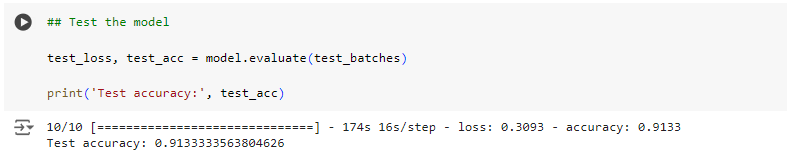


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Setup
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile36
from zipfile36 import ZipFile

In [ ]:
## Data preprocessing

## Download data from gdrive link
! gdown 1W4ZjQugqT3y-J_2Yp_VEroaw0QW81hbZ

Downloading...
From: https://drive.google.com/uc?id=1W4ZjQugqT3y-J_2Yp_VEroaw0QW81hbZ
To: /content/G7_resized.zip
100% 12.6M/12.6M [00:00<00:00, 56.1MB/s]


In [ ]:
## Unzip the download file
with ZipFile('/content/G7_resized.zip','r') as zipObj:
  zipObj.extractall()

In [ ]:
## Define batch size and image size
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
## Data splitting (70% training data & 30% testing data)

# Define the path to dataset directory
dataset_dir = '/content/G7_resized'

# Define the path to the directory to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

['Pasta', 'Rice']
/content/G7_resized/Pasta/IMG_6822.jpg
/content/output/train/Pasta/IMG_6822.jpg
/content/G7_resized/Pasta/IMG_20240529_201050.jpg
/content/output/train/Pasta/IMG_20240529_201050.jpg
/content/G7_resized/Pasta/20240530_144506.jpg
/content/output/train/Pasta/20240530_144506.jpg
/content/G7_resized/Pasta/IMG20240531112146.jpg
/content/output/train/Pasta/IMG20240531112146.jpg
/content/G7_resized/Pasta/20240530_144745.jpg
/content/output/train/Pasta/20240530_144745.jpg
/content/G7_resized/Pasta/IMG_6832.jpg
/content/output/train/Pasta/IMG_6832.jpg
/content/G7_resized/Pasta/Pasta_F_M (71).jpg
/content/output/train/Pasta/Pasta_F_M (71).jpg
/content/G7_resized/Pasta/IMG20240531111925.jpg
/content/output/train/Pasta/IMG20240531111925.jpg
/content/G7_resized/Pasta/20240530_144950.jpg
/content/output/train/Pasta/20240530_144950.jpg
/content/G7_resized/Pasta/IMG20240531112135.jpg
/content/output/train/Pasta/IMG20240531112135.jpg
/content/G7_resized/Pasta/IMG_20240529_201612_1.jpg


In [ ]:
# Define the path to the subfolder containing the images
test_rice_path = '/content/output/test/Rice'
test_pasta_path = '/content/output/test/Pasta'
train_rice_path = '/content/output/train/Rice'
train_pasta_path = '/content/output/train/Pasta'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_rice_path) if os.path.isfile(os.path.join(test_rice_path, name))])
num_images2 = len([name for name in os.listdir(test_pasta_path) if os.path.isfile(os.path.join(test_pasta_path, name))])
num_images3 = len([name for name in os.listdir(train_rice_path) if os.path.isfile(os.path.join(train_rice_path, name))])
num_images4 = len([name for name in os.listdir(train_pasta_path) if os.path.isfile(os.path.join(train_pasta_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/rice: {num_images1}")
print(f"Number of images in the test/pasta: {num_images2}")
print(f"Number of images in the train/rice: {num_images3}")
print(f"Number of images in the train/pasta: {num_images4}")

Number of images in the test/rice: 150
Number of images in the test/pasta: 150
Number of images in the train/rice: 350
Number of images in the train/pasta: 350


In [ ]:
# Create an instance of the ImageDataGenerator with for training and testing
# ImageDataGenerator - for image augmentation

# without image augmentation
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation

test_data_generator = ImageDataGenerator()

names = ["Rice" , "Pasta"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 560 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


(32, 224, 224, 3)
(32,)


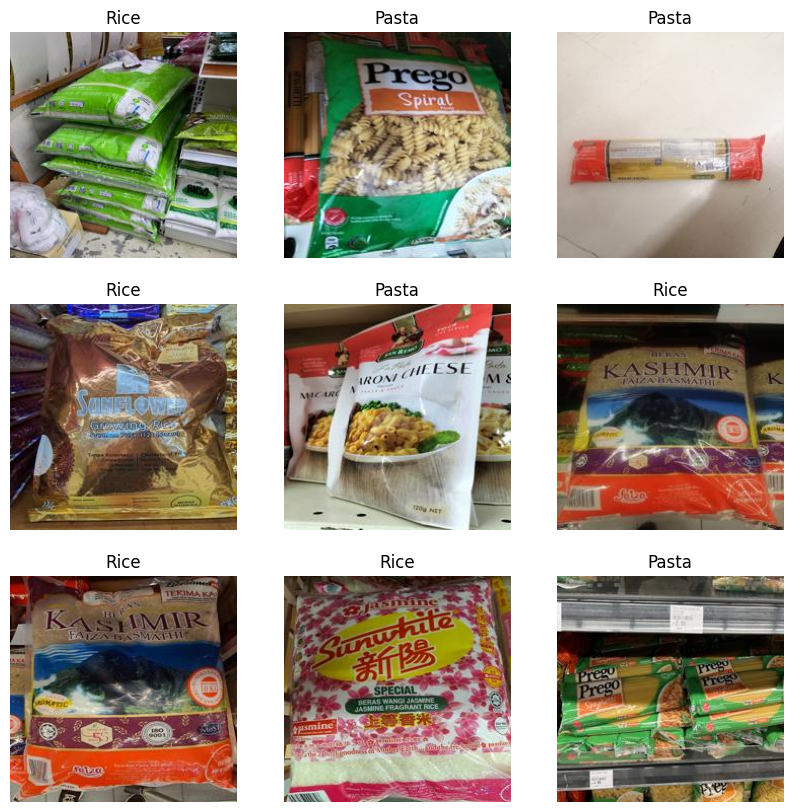

In [ ]:
## Visualize the data
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

In [ ]:
## Create the base model from the pre-trained VGG16
base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()

****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxP

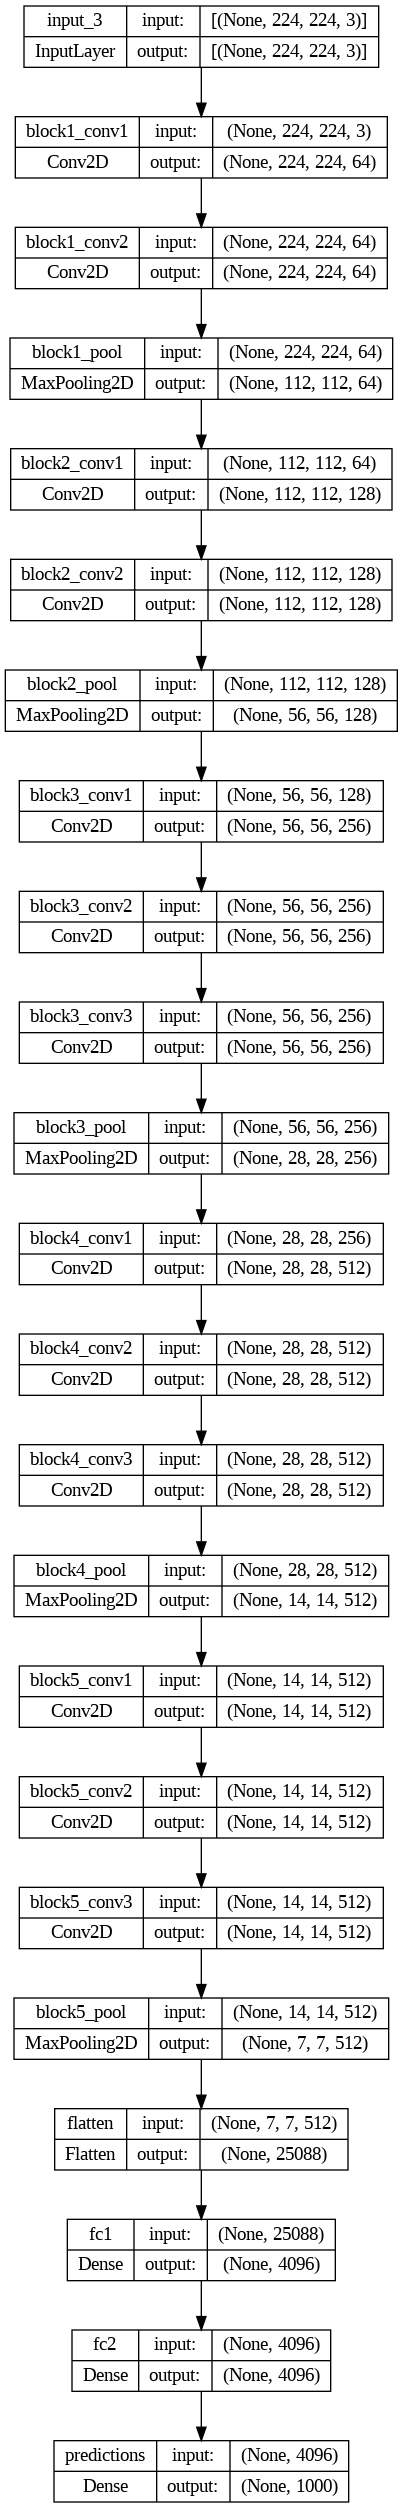

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

In [ ]:
#Create a model by copying from the 1st layer to the 2nd last layer # freeze last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()

****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                           

In [ ]:
## Freezing the existing weight
for layer in model.layers:
    layer.trainable = False
print(model.summary())

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
## Compile the model

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## Train the model
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)


Epoch 1/5
18/18 [==============================] - 5s 215ms/step - loss: 0.7075 - accuracy: 0.7250 - val_loss: 0.5189 - val_accuracy: 0.7500
Epoch 2/5
18/18 [==============================] - 3s 189ms/step - loss: 0.1890 - accuracy: 0.9250 - val_loss: 0.5617 - val_accuracy: 0.8071
Epoch 3/5
18/18 [==============================] - 3s 192ms/step - loss: 0.0987 - accuracy: 0.9714 - val_loss: 0.6203 - val_accuracy: 0.8000
Epoch 4/5
18/18 [==============================] - 4s 197ms/step - loss: 0.0428 - accuracy: 0.9946 - val_loss: 0.6911 - val_accuracy: 0.7571
Epoch 5/5
18/18 [==============================] - 4s 196ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.7269 - val_accuracy: 0.7786


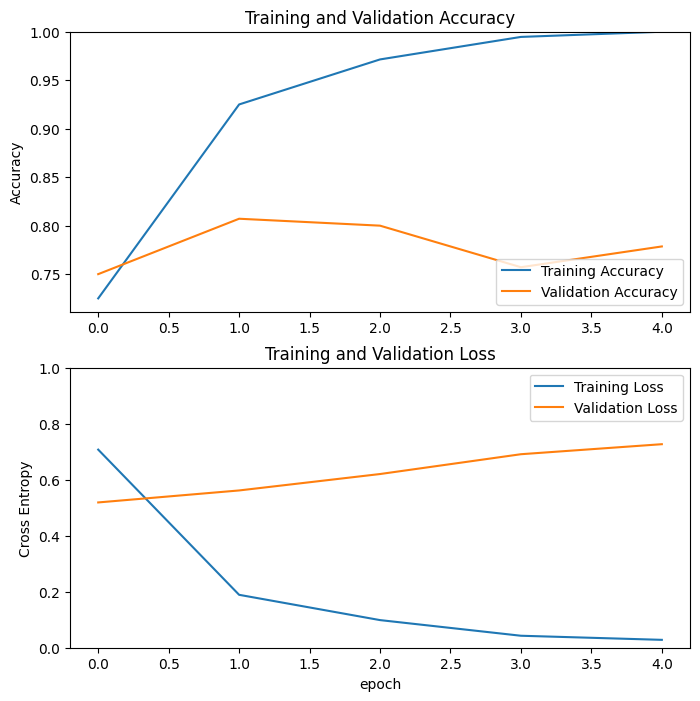

In [ ]:
## Plot the learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
## Test the model

test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

10/10 [==============================] - 1s 133ms/step - loss: 0.2319 - accuracy: 0.9167
Test accuracy: 0.9166666865348816


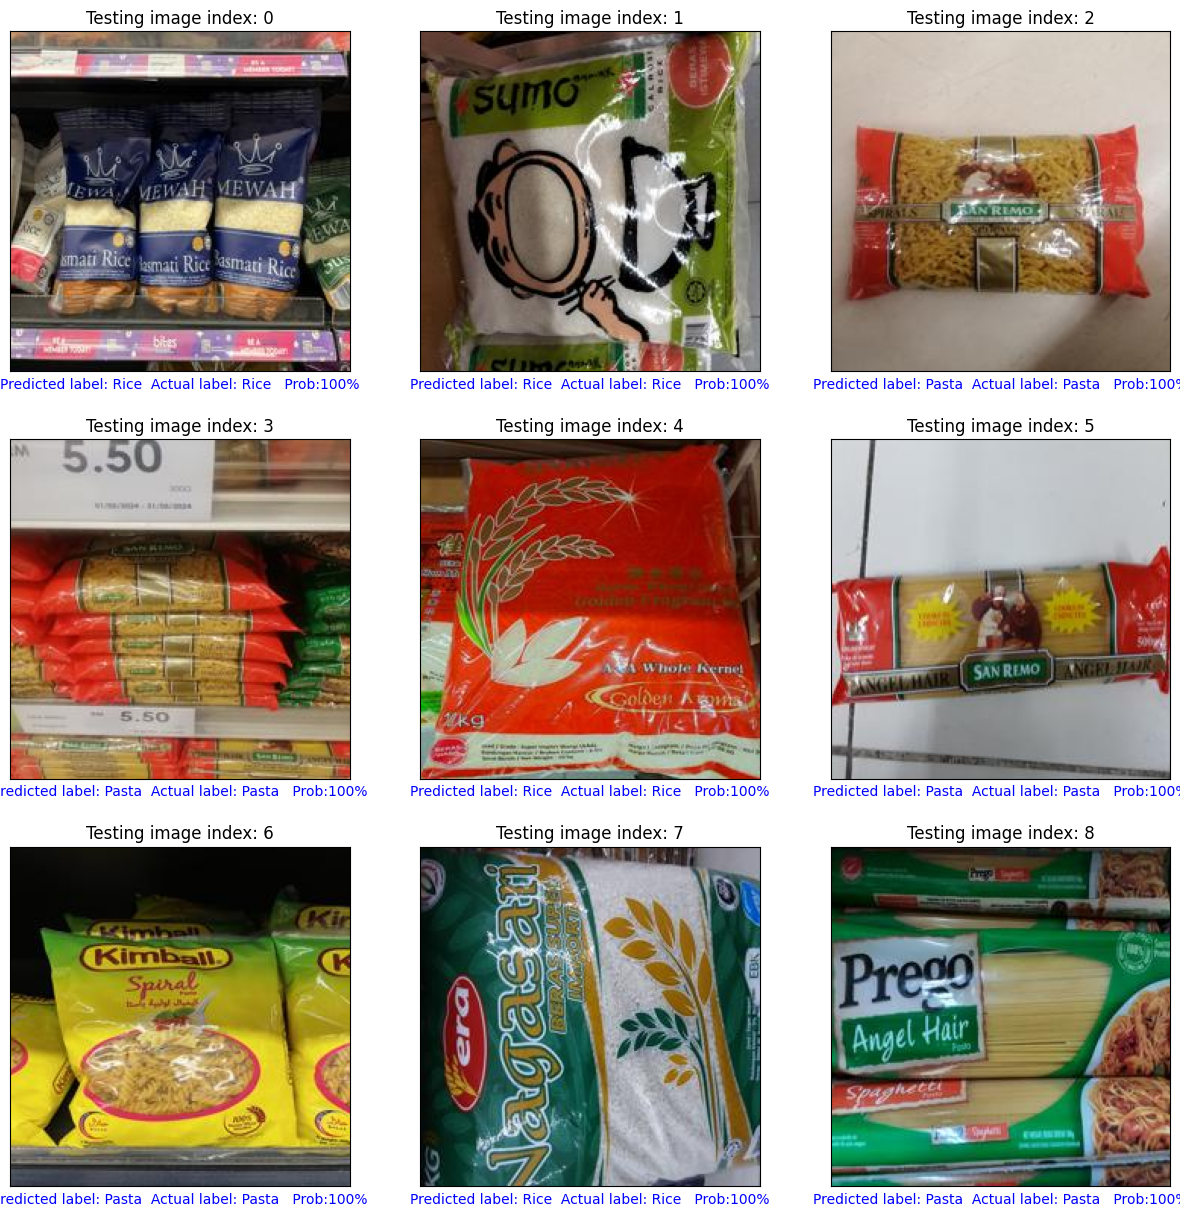

In [ ]:
## Test the developed model in several test images and visual the image, the predicted label, actual label and the probability (in %)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(15, 15))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))


# c) With image augmentation, Only unfreeze the last layer



---



1.   **image augmentation code:**

train_data_generator = ImageDataGenerator( validation_split=0.2,
                                          rotation_range = 20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          )
                                          
- Used to create an image generator for training data that includes a 20% validation split and applies data augmentation, which includes rotating images up to 20 degrees, shifting images up to 20% of the width or 20% of the height.
- The result of the image augmentation can be seen in the result below.


2.   **unfreeze the last layer code:**

model.add(tf.keras.layers.Dense(2))

- This code is added after freezing the other layers in the VGG16 model, thus making the last layer the only layer that is unfreeze.





Found 560 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
(32, 224, 224, 3)
(32,)
****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                         

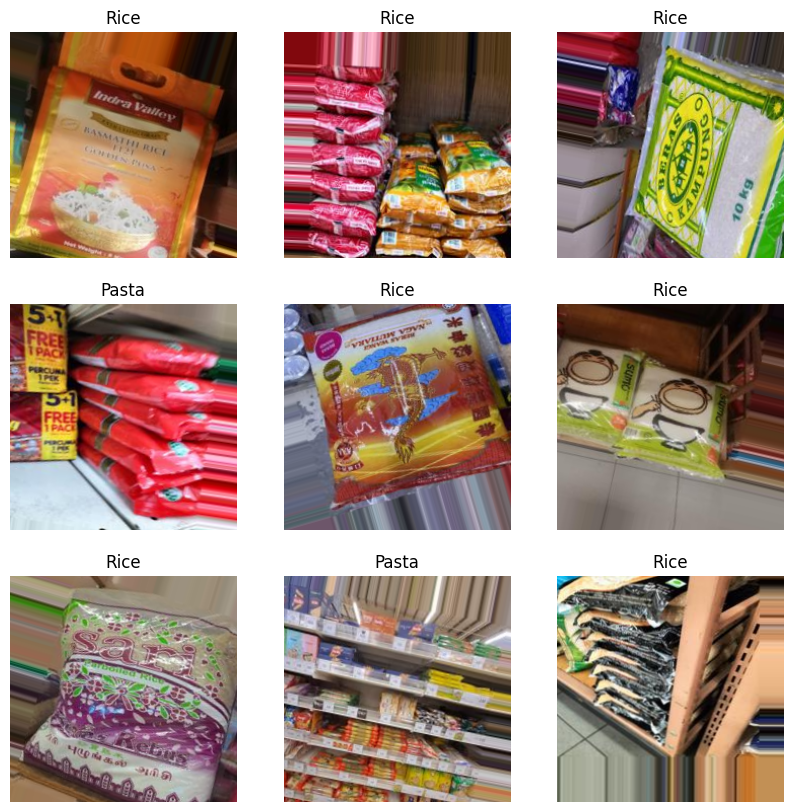

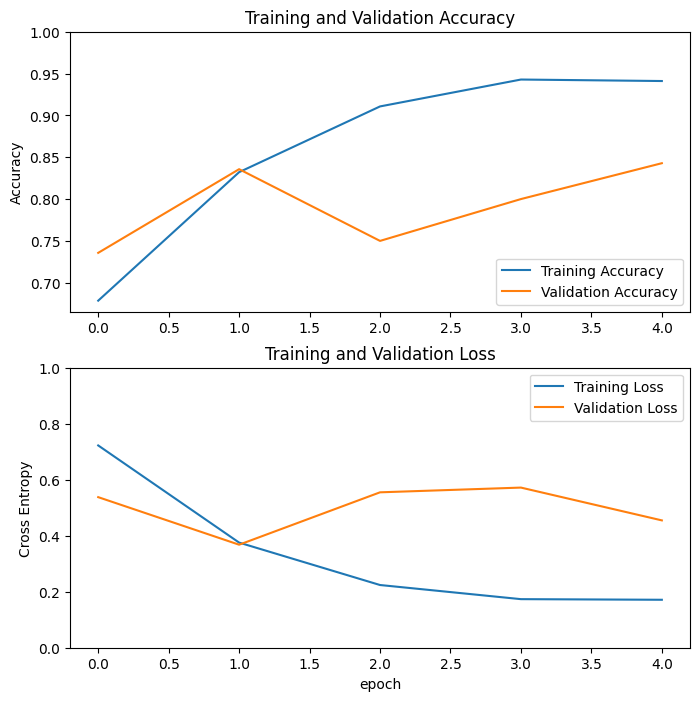

10/10 [==============================] - 1s 134ms/step - loss: 0.1944 - accuracy: 0.9200
Test accuracy: 0.9200000166893005


In [ ]:
batch_size = 32 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

# Define the path to your dataset directory
dataset_dir = '/content/G7_resized'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

# Define the path to the subfolder containing the images
test_Pasta_path = '/content/output/test/Pasta'
test_Rice_path = '/content/output/test/Rice'
train_Pasta_path = '/content/output/train/Pasta'
train_Rice_path = '/content/output/train/Rice'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_Pasta_path) if os.path.isfile(os.path.join(test_Pasta_path, name))])
num_images2 = len([name for name in os.listdir(test_Rice_path) if os.path.isfile(os.path.join(test_Rice_path, name))])
num_images3 = len([name for name in os.listdir(train_Pasta_path) if os.path.isfile(os.path.join(train_Pasta_path, name))])
num_images4 = len([name for name in os.listdir(train_Rice_path) if os.path.isfile(os.path.join(train_Rice_path, name))])


train_data_generator = ImageDataGenerator( validation_split=0.2,
                                          rotation_range = 20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          )

test_data_generator = ImageDataGenerator()

names = ["Pasta" , "Rice"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")


# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()


tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

#Freezing the existing weights
for layer in model.layers:
    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

# d) No image augmentation, Only unfreeze the last and 2nd last layer


---


1.   **No image augmentation code:**

train_data_generator = ImageDataGenerator( validation_split=0.2)


*   Create an image generator for training data that includes a 20% validation split only


2.   **Unfreeze last and 2nd last layer code:**

for layer in model.layers[-2:]:
    layer.trainable = True


*   After adding new layer, this code added to unfreeze the '-2' layer, which means the 2nd last layer in the VGG16 model.




Found 560 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                 

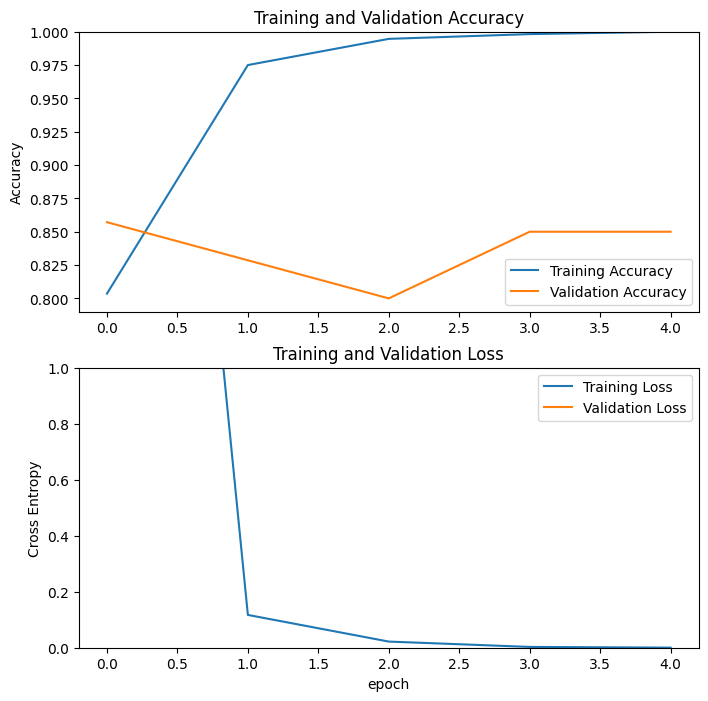

10/10 [==============================] - 194s 19s/step - loss: 0.4704 - accuracy: 0.9600
Test accuracy: 0.9599999785423279


In [ ]:
batch_size = 32 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

# Define the path to your dataset directory
dataset_dir = '/content/G7_resized'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

# Define the path to the subfolder containing the images
test_Pasta_path = '/content/output/test/Pasta'
test_Rice_path = '/content/output/test/Rice'
train_Pasta_path = '/content/output/train/Pasta'
train_Rice_path = '/content/output/train/Rice'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_Pasta_path) if os.path.isfile(os.path.join(test_Pasta_path, name))])
num_images2 = len([name for name in os.listdir(test_Rice_path) if os.path.isfile(os.path.join(test_Rice_path, name))])
num_images3 = len([name for name in os.listdir(train_Pasta_path) if os.path.isfile(os.path.join(train_Pasta_path, name))])
num_images4 = len([name for name in os.listdir(train_Rice_path) if os.path.isfile(os.path.join(train_Rice_path, name))])


# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation

test_data_generator = ImageDataGenerator()

names = ["Pasta" , "Rice"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()


tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

#Freezing the existing weights
for layer in model.layers:
    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

# unfreeze 2 last layers
for layer in model.layers[-2:]:
    layer.trainable = True

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

# Chapter 3: Discussion


In this chapter, the results obtained from different model configurations for the automated grocery detection system aimed at classifying pasta and rice will be analyzed.


---



**3.1 Comparison of Results**

**Configuration 1: No image augmentation and only unfreeze the last layer**

Testing accuracy: 0.9133

In this configuration, the local dataset was used without any image augmentation techniques, and only the last layer of the VGG16 model was unfrozen. This setting provided a solid baseline accuracy of 91.33%. The model was able to capture some relevant features, but the lack of data augmentation and limited fine-tuning might have restricted its ability to generalize well to new images.



**Configuration 2: With image augmentation, Only unfreeze the last layer**

Testing accuracy: 0.9267

 By introducing image augmentation, including rotation and shifting, the model's testing accuracy improved to approximately 92.67%. Data augmentation helps in creating a more diverse training dataset, which allows the model to learn more robust features and generalize better. Despite only unfreezing the last layer, the model benefited from the augmented data, indicating that image variability plays a crucial role in improving classification performance.


**Configuration 3: No image augmentation, Only unfreeze the last and 2nd last layer**

Testing accuracy: 0.9600

In this scenario, no image augmentation was applied, but both the last and second last layers of the VGG16 model were unfrozen. This setup yielded the highest testing accuracy of 96%. Unfreezing additional layers allowed the model to fine-tune more parameters and adapt better to the specific features of the pasta and rice images. This indicates that while image augmentation is beneficial, further fine-tuning of the model can significantly enhance its performance, even without additional data manipulation.

**3.2 Analysis of parameter variations**

Image augmentation introduces variations in the training data, which helps the model to learn more generalized features. The improvement from 91.33% to 92.67% accuracy demonstrates that augmentation can be crucial when dealing with limited datasets. Techniques such as rotation and shifting make the model more resilient to variations in image capture conditions.

Unfreezing more layers allows the model to adjust more of its parameters during training, leading to better feature extraction and classification. The significant jump in accuracy from 92.67% to 96% when unfreezing the last two layers indicates that deeper fine-tuning can substantially improve model performance. This is especially important in transfer learning scenarios where the pre-trained model needs to adapt to new, specific tasks.

**3.3 Batch size and Epoch selection**

For this project, the batch size is set to 32, and the number of epochs is set to 5. These settings were chosen based on trial and error by all team members, and this combination was found to be the best. The figure below shows the comparison of each combination and its accuracy in different model configurations.

Batch size and epoch are two crucial parameters which influence model accuracy. Batch size is defined as the required total number of images for one iteration during training (Aldin & Aldin, 2022). While, epoch indicates the completion of taining over a dataset (Afaq & Rao, 2020). From the results, it can be observed that increasing the epoch has improved the accuracy of the model. Consequently, increasing the batch size does not necessarily increase accuracy during the configurations conducted by the group. By increasing the number of epochs which allow the model to go through the data multiple times, accuracy improves as the model learns more from the dataset.

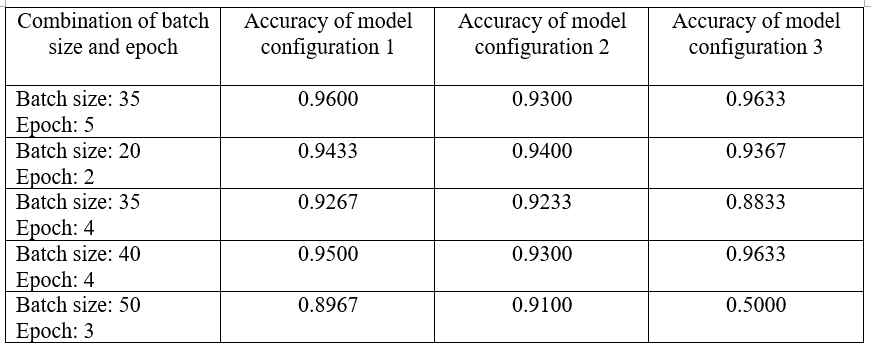



# Chapter 4: Conclusion

This project successfully developed an automated algorithm for classifying two classes of grocery items using Convolutional Neural Network (CNN) transfer learning techniques. By creating a localized dataset with images taken in different modes, the project ensured that the model could handle variations in camera angles and scales. The training and evaluation process demonstrated that a CNN model with a batch size of 32 and 5 epochs yielded high testing accuracies under different configurations: 0.91 for no image augmentation with only the last layer unfrozen, 0.92 for image augmentation with only the last layer unfrozen, and 0.96 for no image augmentation with the last and second last layers unfrozen. These results highlight the robustness and effectiveness of the chosen approach, particularly in configurations without image augmentation. The model has the potential to be a dependable assistive tool for visually impaired people, helping them to identify supermarket products reliably and improving their independence and quality of life. This is demonstrated by the high accuracy attained in various settings. This project demonstrates the feasibility and practicality of applying advanced machine learning techniques to develop specialized assistive technologies.


## References

Afaq, S., & Rao, S. (2020). Significance of epochs on training a neural network. Int. J. Sci. Technol. Res, 9(06), 485-488.

Aldin, N. B., & Aldin, S. S. A. B. (2022, March). Accuracy comparison of different batch size for a supervised machine learning task with image classification. In 2022 9th International Conference on Electrical and Electronics Engineering (ICEEE) (pp. 316-319). IEEE.